# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [10]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline

#read data
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [11]:
# missing values
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

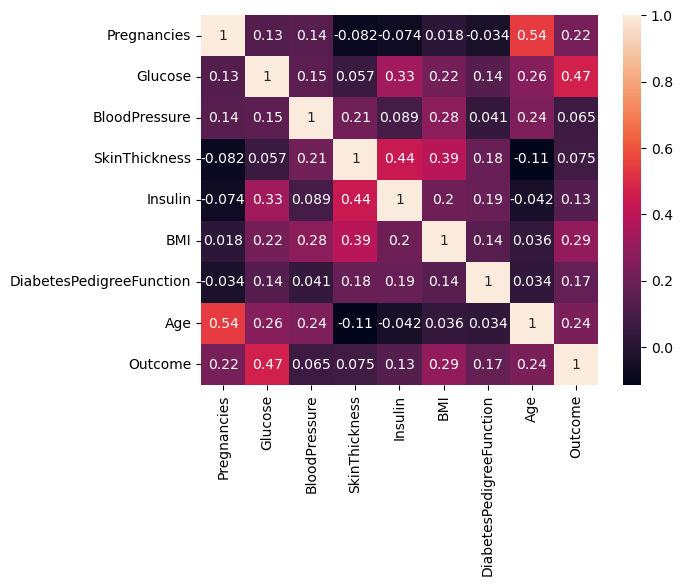

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


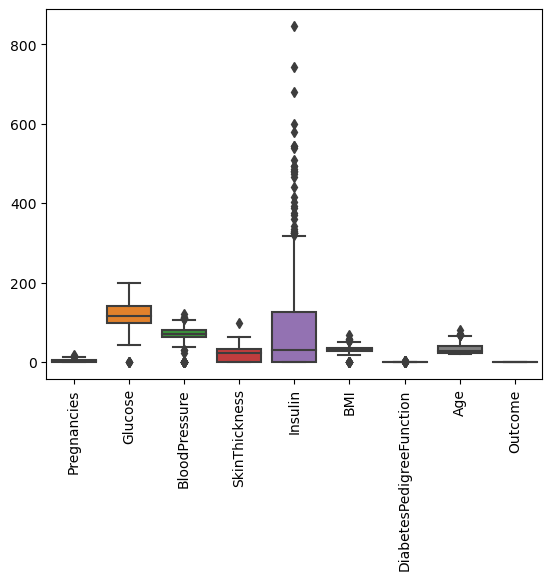

In [14]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

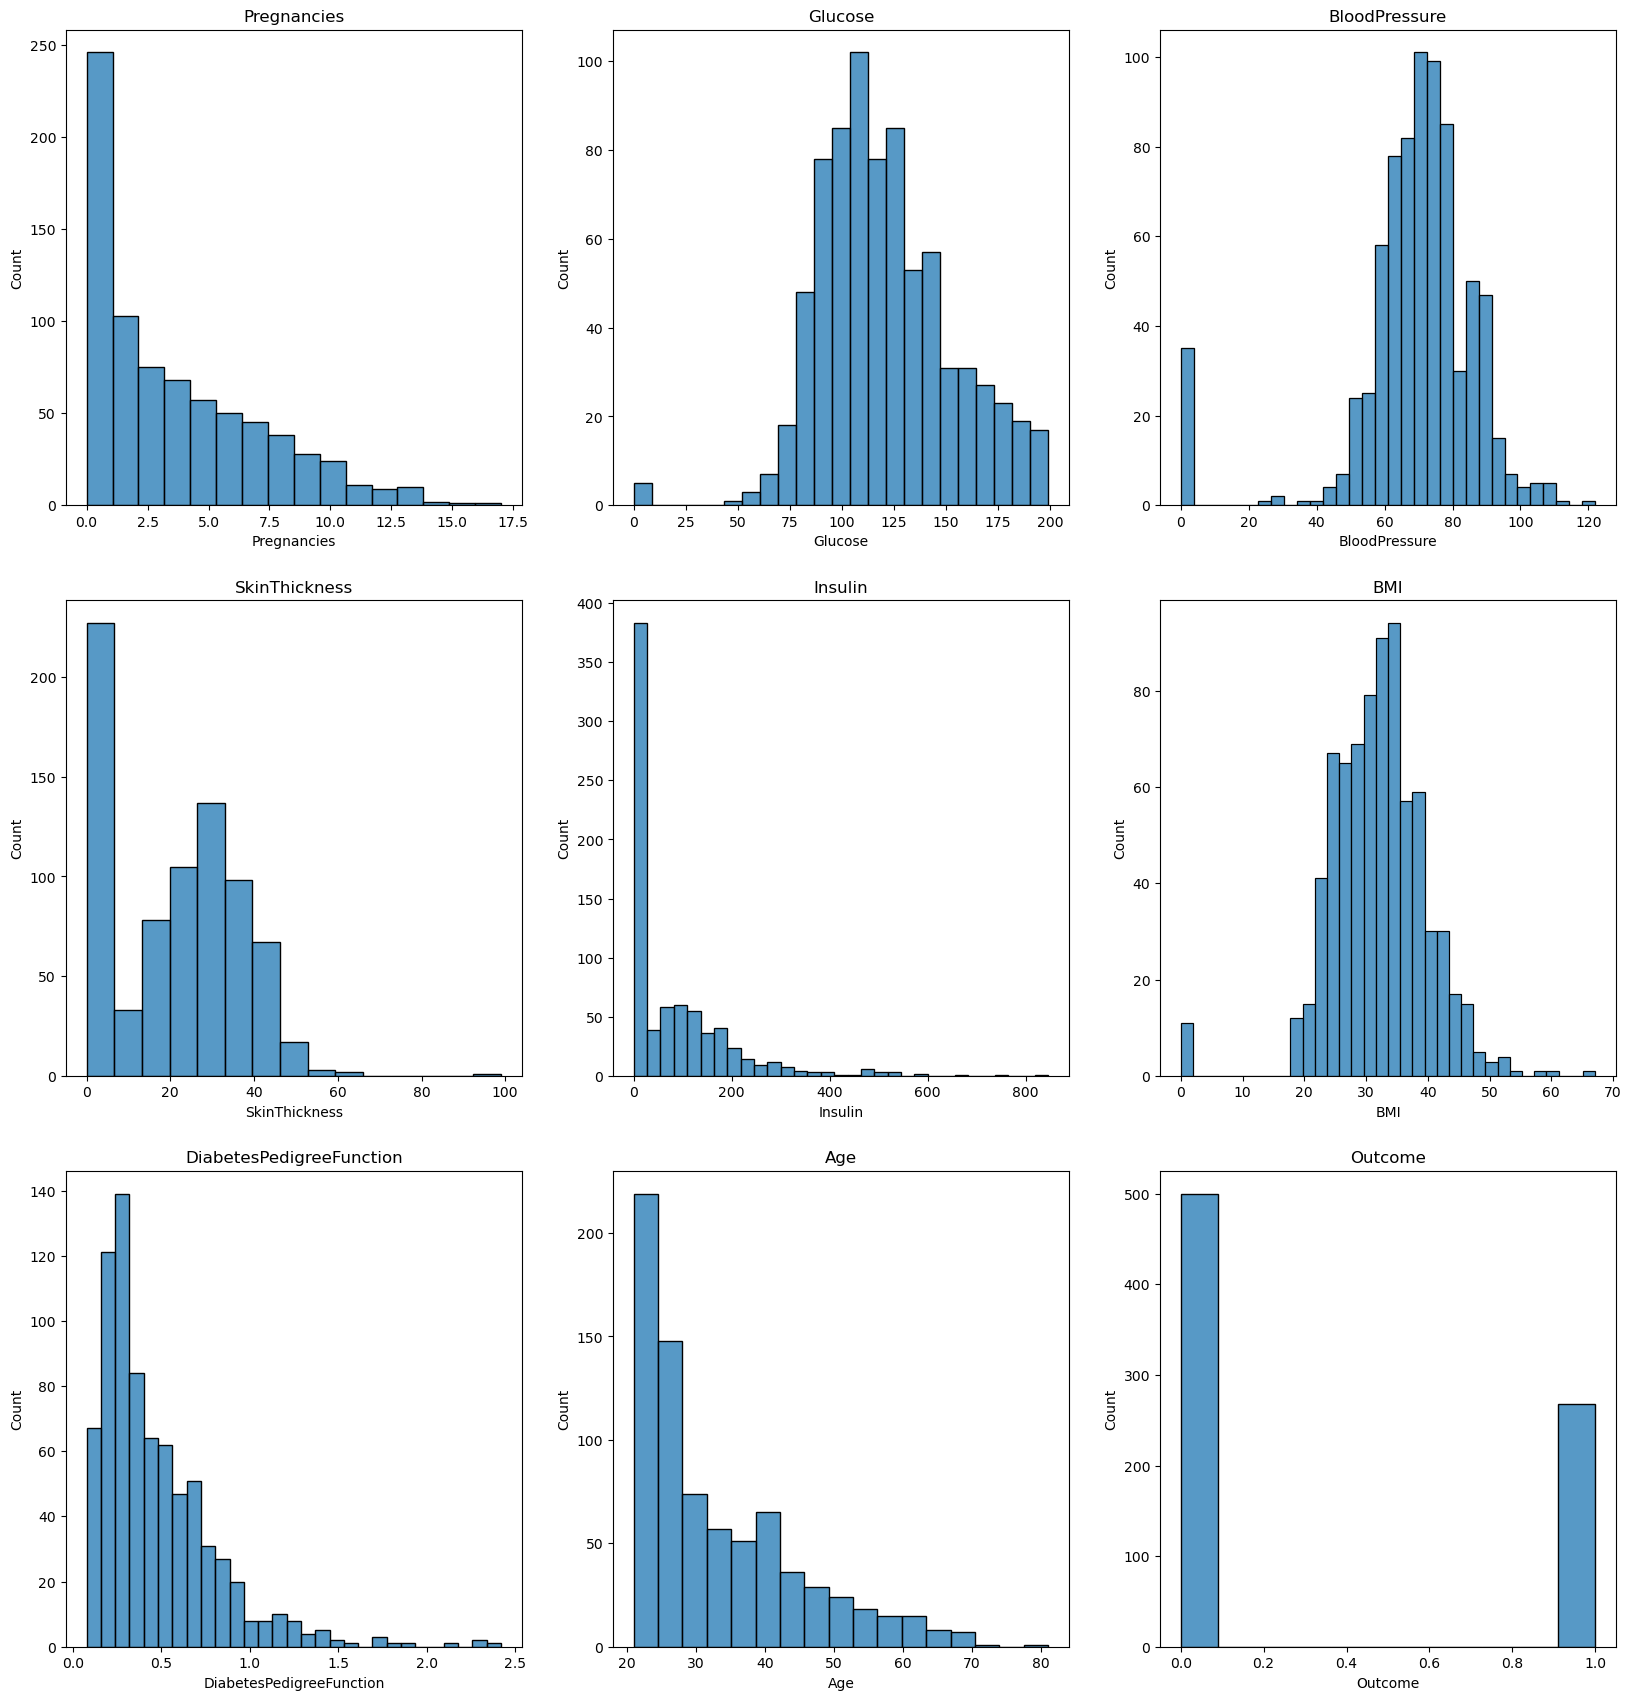

In [15]:
def grouphist(columns):
    fig, axs = plt.subplots(nrows=math.ceil(len(columns) / 3), ncols=3, figsize=(20, math.ceil(len(columns) / 3) * 7))
    for idx, ax in enumerate(axs.flatten()):
        sns.histplot(df[columns[idx]], ax=ax)
        ax.set_title(columns[idx])
    plt.show()
grouphist(df.columns)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [7]:
# no missing values

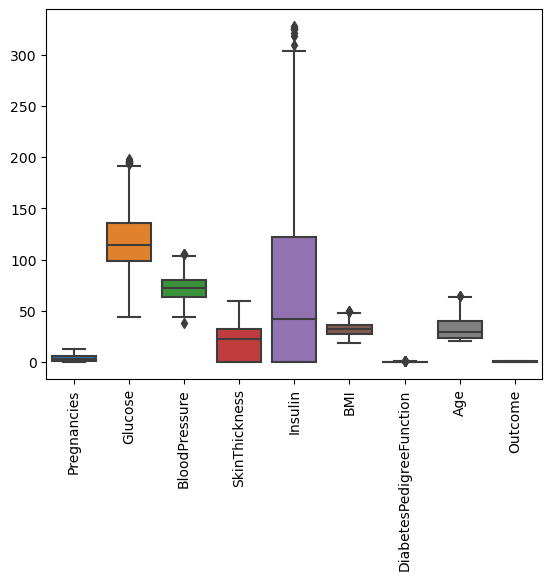

In [16]:
# removing outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

for col in df.columns:
    df = remove_outliers(df, col)
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

IndexError: list index out of range

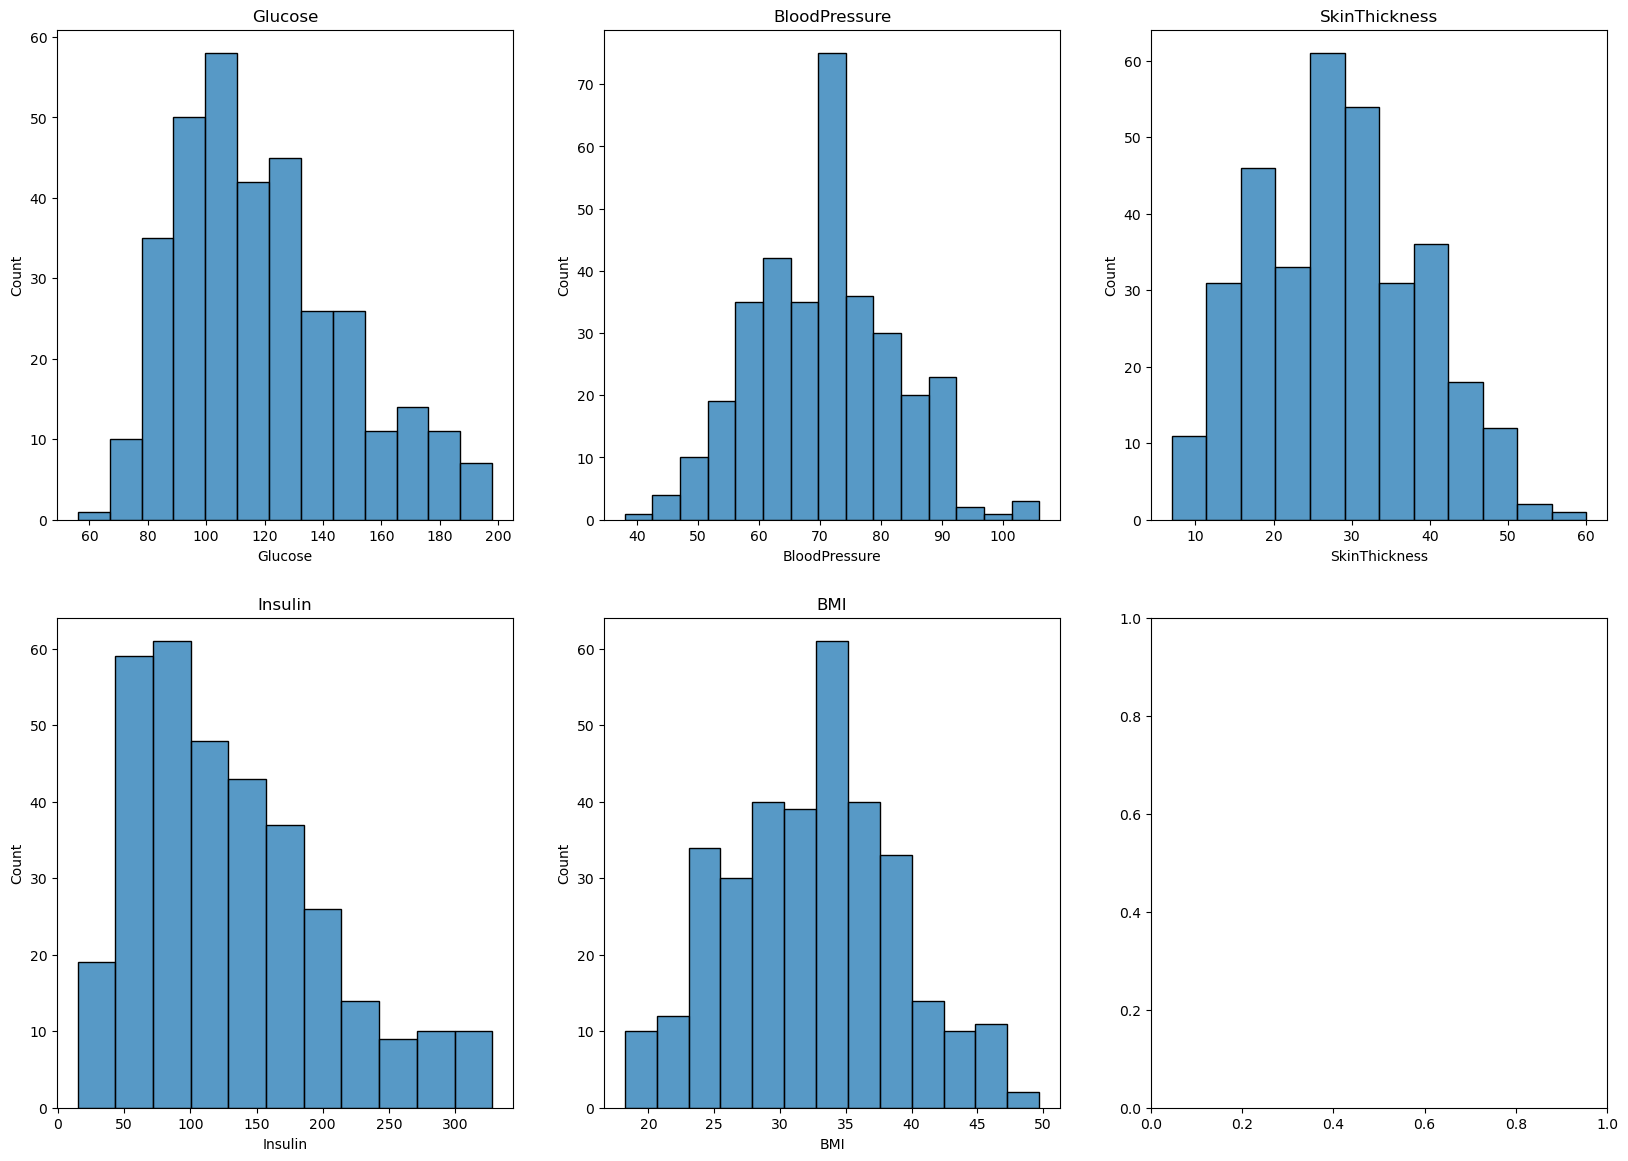

In [17]:
# remove all 0s from glucose, blood pressure, skin thickness, insulin, bmi
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns:
    df = df[df[col] != 0]
grouphist(columns)

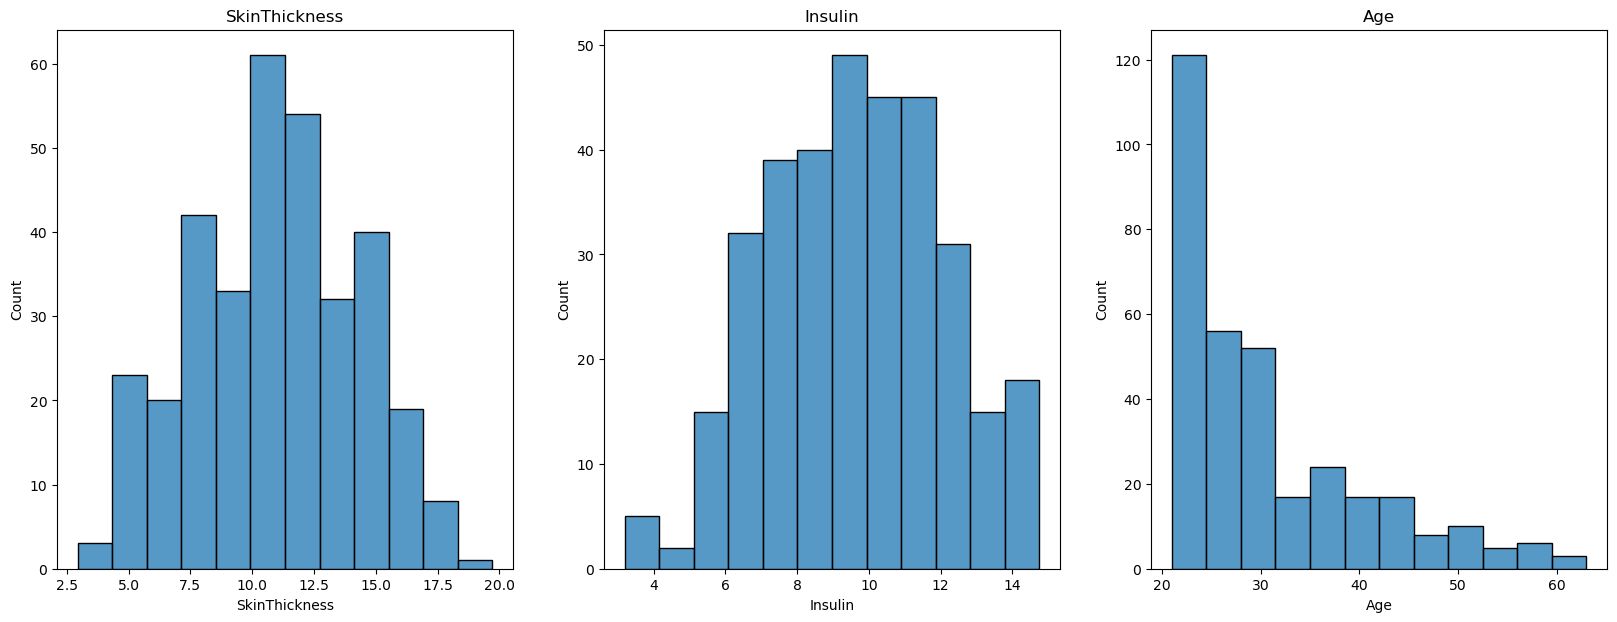

In [ ]:
# no need for scaling

# normalization
# age, pregnancies, skin thickness, insulin, diabetes pedigree function
columns = ['SkinThickness', 'Insulin']
for col in columns:
    df[col] = stats.boxcox(df[col])[0]
grouphist(columns + ['Age'])

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [18]:
# feature selection
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [23]:
result = search.fit(X, y)

c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver


In [24]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.802792632204397
Best Hyperparameters: {'C': 0.005989248318482515, 'penalty': 'l2', 'solver': 'newton-cg'}


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(**result.best_params_)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        46
           1       0.77      0.45      0.57        22

    accuracy                           0.78        68
   macro avg       0.78      0.69      0.71        68
weighted avg       0.78      0.78      0.76        68

0.7794117647058824


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

The conclusion that I would draw from the model developed from this diabetes dataset is that using the hyperparameters of the model, we can predict whether a patient has diabetes or not with an accuracy of 0.78. The model is not perfect, but it is a good start. The model can be improved by using more data, and by using more features. The model can also be improved by using more advanced techniques, such as deep learning.

Furthermore, I have more findings listed below:
1. Data examination stage: I found that the column most related to the Outcome is the Glucose level from th heatmap.
2. Data cleaning stage: I found that the data has no null values, but some invalid values such as 0 in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns. I also found that the data has some outliers.
3. Preprocessing stage: after removing the invalid data, I found that some columns are imbalanced, such as the DiabetesPedigreeFunction column. 
4. Model training stage: I found that the best model is the Log Regression Classifier with an accuracy of 0.78, and the best hyperparameters are {'C': 0.005989248318482515, 'penalty': 'l2', 'solver': 'newton-cg'}